In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('data.csv',encoding="ISO-8859-1", dtype={'CustomerID': str,'InvoiceID': str})

#df = pd.read_csv('data.csv')

In [ ]:
import re
df['InvoiceNo'].str.contains('C', flags = re.IGNORECASE, regex = True)

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Name: InvoiceNo, Length: 541909, dtype: bool

In [ ]:
df[df['InvoiceNo'].str.contains('C', flags = re.IGNORECASE, regex = True)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [ ]:
idx_cancelled_invoices = df[df['InvoiceNo'].str.contains('C', flags = re.IGNORECASE, regex = True)].index
idx_cancelled_invoices

Int64Index([   141,    154,    235,    236,    237,    238,    239,    240,
               241,    939,
            ...
            540141, 540142, 540176, 540422, 540448, 540449, 541541, 541715,
            541716, 541717],
           dtype='int64', length=9288)

In [ ]:
df = df[~(df['InvoiceNo'].str.contains('C', flags = re.IGNORECASE, regex = True))]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134697
Country             0
dtype: int64

In [ ]:
print(f"Before Dropping CustomerID Null Rows:\nNumber of rows = {df.shape[0]}\nNumber of cols = {df.shape[1]}")
df.dropna(inplace = True)
print(f"\nAfter Dropping CustomerID Null Rows:\nNumber of rows = {df.shape[0]}\nNumber of cols = {df.shape[1]}")

Before Dropping CustomerID Null Rows:
Number of rows = 532621
Number of cols = 8

After Dropping CustomerID Null Rows:
Number of rows = 397924
Number of cols = 8


In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
print(f"Before Dropping Duplicates:\nNumber of rows = {df.shape[0]}\nNumber of cols = {df.shape[1]}")
df.drop_duplicates(inplace = True)
print(f"\nAfter Dropping Duplicates:\nNumber of rows = {df.shape[0]}\nNumber of cols = {df.shape[1]}")

Before Dropping Duplicates:
Number of rows = 397924
Number of cols = 8

After Dropping Duplicates:
Number of rows = 392732
Number of cols = 8


In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [ ]:
df['CustomerID'] = df['CustomerID'].astype('int64').astype('category')
df['CustomerID'].dtype

CategoricalDtype(categories=[12346, 12347, 12348, 12349, 12350, 12352, 12353, 12354,
                  12355, 12356,
                  ...
                  18273, 18274, 18276, 18277, 18278, 18280, 18281, 18282,
                  18283, 18287],
, ordered=False)

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'].dtype

dtype('<M8[ns]')

In [ ]:
df.describe()

,Quantity,UnitPrice
count,392732.000000,392732.000000
mean,13.153718,3.125596
std,181.588420,22.240725
min,1.000000,0.000000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


### Extract Recency, Frequency, Monetary (RFM) Metrics

Group the data frame by customer ID separately and aggregate the `InvoiceDate`, `Quantity` and `UnitPrice` columns.

In [ ]:
df['TotalPurchaseValue'] = df['Quantity'] * df['UnitPrice']
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPurchaseValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08


In [ ]:
customer_wise_total_purchase_value_df = df[['CustomerID', 'TotalPurchaseValue']].groupby('CustomerID', as_index = False).sum()
customer_wise_total_purchase_value_df.rename(columns = {'TotalPurchaseValue' : 'Monetary'}, inplace = True)
customer_wise_total_purchase_value_df

,CustomerID,Monetary
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40
...,...,...
4334,18280,180.60
4335,18281,80.82
4336,18282,178.05
4337,18283,2045.53


In [ ]:
customer_wise_frequent_purchases_df =  df[['CustomerID', 'InvoiceNo']].groupby('CustomerID', as_index = False).count()
customer_wise_frequent_purchases_df.rename(columns = {'InvoiceNo': 'Frequency'}, inplace = True)
customer_wise_frequent_purchases_df

,CustomerID,Frequency
0,12346,1
1,12347,182
2,12348,31
3,12349,73
4,12350,17
...,...,...
4334,18280,10
4335,18281,7
4336,18282,12
4337,18283,721


In [ ]:
merged_df = customer_wise_total_purchase_value_df.merge(customer_wise_frequent_purchases_df, on = "CustomerID", how = "inner")
merged_df

,CustomerID,Monetary,Frequency
0,12346,77183.60,1
1,12347,4310.00,182
2,12348,1797.24,31
3,12349,1757.55,73
4,12350,334.40,17
...,...,...,...
4334,18280,180.60,10
4335,18281,80.82,7
4336,18282,178.05,12
4337,18283,2045.53,721


In [ ]:
last_purchase_df = df[['CustomerID', 'InvoiceDate']].groupby('CustomerID', as_index = False).max()
last_purchase_df.rename(columns = {'InvoiceDate': 'LastPurchaseDate'}, inplace = True)
last_purchase_df

,CustomerID,LastPurchaseDate
0,12346,2011-01-18 10:01:00
1,12347,2011-12-07 15:52:00
2,12348,2011-09-25 13:13:00
3,12349,2011-11-21 09:51:00
4,12350,2011-02-02 16:01:00
...,...,...
4334,18280,2011-03-07 09:52:00
4335,18281,2011-06-12 10:53:00
4336,18282,2011-12-02 11:43:00
4337,18283,2011-12-06 12:02:00


In [ ]:
days_since_last_purchase = df['InvoiceDate'].max() - last_purchase_df['LastPurchaseDate'] 
days_since_last_purchase = days_since_last_purchase + pd.Timedelta("1 days")
days_since_last_purchase

0      326 days 02:49:00
1        2 days 20:58:00
2       75 days 23:37:00
3       19 days 02:59:00
4      310 days 20:49:00
              ...       
4334   278 days 02:58:00
4335   181 days 01:57:00
4336     8 days 01:07:00
4337     4 days 00:48:00
4338    43 days 03:21:00
Name: LastPurchaseDate, Length: 4339, dtype: timedelta64[ns]

In [ ]:
time_diff_in_days = pd.Series(data = [d.days for d in days_since_last_purchase], index = merged_df.index)
time_diff_in_days

0       326
1         2
2        75
3        19
4       310
       ... 
4334    278
4335    181
4336      8
4337      4
4338     43
Length: 4339, dtype: int64

In [ ]:
merged_df['Recency'] = time_diff_in_days
merged_df

,CustomerID,Monetary,Frequency,Recency
0,12346,77183.60,1,326
1,12347,4310.00,182,2
2,12348,1797.24,31,75
3,12349,1757.55,73,19
4,12350,334.40,17,310
...,...,...,...,...
4334,18280,180.60,10,278
4335,18281,80.82,7,181
4336,18282,178.05,12,8
4337,18283,2045.53,721,4


In [ ]:
merged_df.isnull().sum()

CustomerID    0
Monetary      0
Frequency     0
Recency       0
dtype: int64

In [ ]:
merged_df.dropna(inplace = True)
merged_df.drop(columns = 'CustomerID', inplace = True)

In [ ]:
merged_df.isna().sum()

Monetary     0
Frequency    0
Recency      0
dtype: int64

### Data Visualisation

Create histograms and box plots for RFM features to evaluate the data distribution within each features.

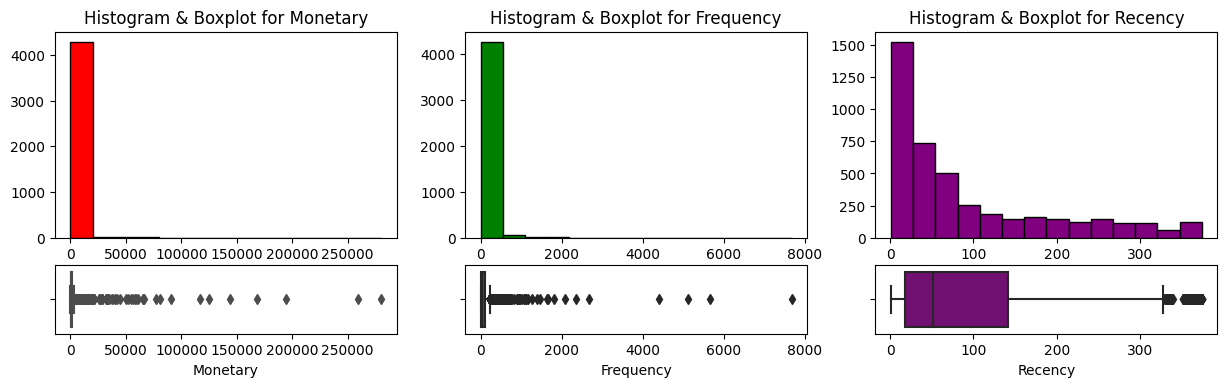

In [ ]:
fig, axis = plt.subplots(nrows = 2, ncols = 3, 
                         figsize = (15, 4), dpi = 100,
                         sharex = False, sharey = False,
                         gridspec_kw = {'height_ratios': [3, 1]}
                         )

# Monetary
axis[0, 0].hist(merged_df['Monetary'], bins = 'sturges', facecolor = 'red', edgecolor = 'black')
sns.boxplot(x = 'Monetary', data = merged_df,  color = 'red', ax = axis[1, 0])
axis[0, 0].set_title("Histogram & Boxplot for Monetary")

# Frequency
axis[0, 1].hist(merged_df['Frequency'], bins = 'sturges', facecolor = 'green', edgecolor = 'black')
sns.boxplot(x = 'Frequency', data = merged_df,  color = 'green', ax = axis[1, 1])
axis[0, 1].set_title("Histogram & Boxplot for Frequency")

# Recency
axis[0, 2].hist(merged_df['Recency'], bins = 'sturges', facecolor = 'purple', edgecolor = 'black')
sns.boxplot(x = 'Recency', data = merged_df,  color = 'purple', ax = axis[1, 2])
axis[0, 2].set_title("Histogram & Boxplot for Recency")

plt.show()

`Monetary` and `Frequency` columns contain highly skewed values which indicates possibility of outliers.

Treating likely outliers in the `Monetary` column with the inter-quartile range (IQR) metric.

In [ ]:
def treating_outliers(df, col):
  col_q1 = df[col].quantile(0.25)
  col_q3 = df[col].quantile(0.75)
  col_iqr = col_q3 - col_q1
  new_df = df[(df[col] >= col_q1 - 1.5 * col_iqr) & (df[col] <= col_q3 + 1.5 * col_iqr)]
  return new_df

new_df = treating_outliers(merged_df, 'Monetary')
new_df = new_df.reset_index(drop = True)
new_df

,Monetary,Frequency,Recency
0,1797.24,31,75
1,1757.55,73,19
2,334.40,17,310
3,2506.04,85,36
4,89.00,4,204
...,...,...,...
3909,180.60,10,278
3910,80.82,7,181
3911,178.05,12,8
3912,2045.53,721,4


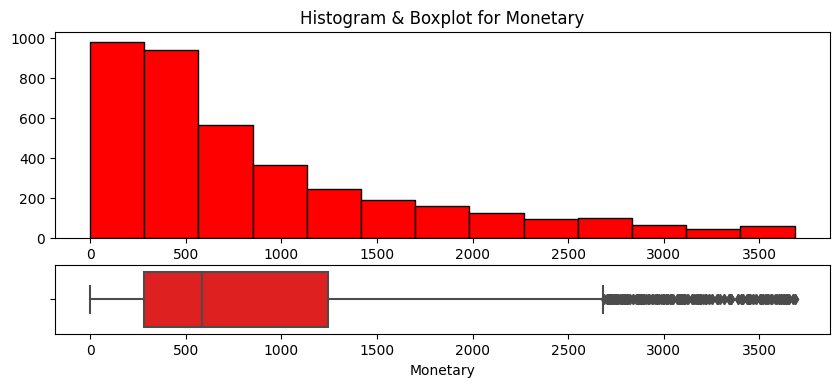

In [ ]:
fig, axis_mon = plt.subplots(nrows = 2, ncols = 1, 
                         figsize = (10, 4), dpi = 100,
                         sharex = False, sharey = False,
                         gridspec_kw = {'height_ratios': [3, 1]}
                         )

# Monetary
axis_mon[0].hist(new_df['Monetary'], bins = 'sturges', facecolor = 'red', edgecolor = 'black')
sns.boxplot(x = 'Monetary', data = new_df,  color = 'red', ax = axis_mon[1])
axis_mon[0].set_title("Histogram & Boxplot for Monetary")

plt.show()

### Feature Scaling

Scaling the RFM features using the standard scaling technique to converge to global centroids faster using the KMeans clustering algorithm.

In [ ]:
# standardise all parameters
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
norm_new = standard_scaler.fit_transform(new_df)
norm_new_df = pd.DataFrame(norm_new)
norm_new_df.columns = new_df.columns
norm_new_df

,Monetary,Frequency,Recency
0,1.103611,-0.390975,-0.245052
1,1.055663,0.161481,-0.796234
2,-0.663580,-0.575127,2.067942
3,1.959880,0.319325,-0.628911
4,-0.960036,-0.746126,1.024634
...,...,...,...
3909,-0.849378,-0.667203,1.752981
3910,-0.969918,-0.706665,0.798256
3911,-0.852459,-0.640896,-0.904502
3912,1.403559,8.685090,-0.943872


In [ ]:
norm_new_df.describe().loc[['mean', 'std'], :]

,Monetary,Frequency,Recency
mean,3.812314e-17,-2.829558e-16,6.291453e-17
std,1.000128e+00,1.000128e+00,1.000128e+00


Mean and standard deviation of values in the RFM features after scaling are 0 and 1 respectively.

### Cluster Tendency

Measuring the cluster tendency of the RFM features using the Hopkins Statistics method.

- If the value is between ${0.01, \dots, 0.3}$, the data is regularly spaced.

- If the value is around $0.5$, it is random.

- If the value is between ${0.7, \dots, 0.99}$, it has a high tendency to cluster.

In [ ]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

hopkins(norm_new_df)

0.9503405628267749

The Hopkins Statistics value is between 0.7 and 0.99. Hence, there is a higher tendency of RFM features towards clustering.

### Building KMeans Model

- Randomly choosing 5 clusters
- Initialising centriods with `k-means++` approach

In [ ]:
# K Means with K = 5: chosen randomly.
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters = 5, init = 'k-means++', random_state = 14)
kmeans_model.fit(norm_new_df)

cluster_labels = pd.Series(data = kmeans_model.labels_, index = norm_new_df.index)
cluster_labels.value_counts()

2    1542
1     952
0     909
3     393
4     118
dtype: int64

In [ ]:
# analysis of clusters formed
km_df = pd.concat([new_df, cluster_labels], axis = 1)
km_df.columns = list(new_df.columns) + ['ClusterLabel']
km_df

,Monetary,Frequency,Recency,ClusterLabel
0,1797.24,31,75,0
1,1757.55,73,19,0
2,334.40,17,310,1
3,2506.04,85,36,3
4,89.00,4,204,1
...,...,...,...,...
3909,180.60,10,278,1
3910,80.82,7,181,1
3911,178.05,12,8,2
3912,2045.53,721,4,4


In [ ]:
import plotly.express as px
# df = px.data.iris()
plotly_fig = px.scatter_3d(km_df, x = 'Monetary', y = 'Frequency', z = 'Recency', color = 'ClusterLabel')
plotly_fig.show()

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

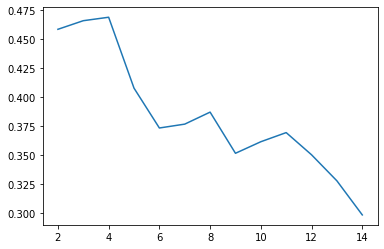

In [ ]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters = k).fit(norm_new_df)
    sse_.append([k, silhouette_score(norm_new_df, kmeans.labels_)])
    
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])

As the number of clusters increase, the similarity of points within a cluster decrease. Hence, Ideally we should chose 4 clusters to be formed.

### Rebuilding KMeans Model

In [ ]:
# Rebuilding KMeans model with 4 clusters.
kmeans_model2 = KMeans(n_clusters = 4, init = 'k-means++', random_state = 14)
kmeans_model2.fit(norm_new_df)

cluster_labels2 = pd.Series(data = kmeans_model2.labels_, index = norm_new_df.index)
cluster_labels2.value_counts()

1    2038
2     985
0     766
3     125
dtype: int64

In [ ]:
# analysis of clusters formed
km_df2 = pd.concat([new_df, cluster_labels2], axis = 1)
km_df2.columns = list(new_df.columns) + ['ClusterLabel']
km_df2

,Monetary,Frequency,Recency,ClusterLabel
0,1797.24,31,75,0
1,1757.55,73,19,0
2,334.40,17,310,2
3,2506.04,85,36,0
4,89.00,4,204,2
...,...,...,...,...
3909,180.60,10,278,2
3910,80.82,7,181,2
3911,178.05,12,8,1
3912,2045.53,721,4,3


In [ ]:
import plotly.express as px
# df = px.data.iris()
plotly_fig2 = px.scatter_3d(km_df2, x = 'Monetary', y = 'Frequency', z = 'Recency', color = 'ClusterLabel')
plotly_fig2.show()